# Programmation d'un neurone artificiel

Formation deep learning de machine learnia (youtube). Etape 5.

* Fonction d'initialisation pour les parametres w et b
* Algo iteratif :
* * Modele de neurone artificiel : fonction z et fonction a
  * Fonction cout
  * Gradients de la fonction cout
  * Update w et b (descente de gradients)

## Mise en place

In [257]:
#!pip install tqdm

Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 0.0/57.6 kB ? eta -:--:--
     --------------------------- ---------- 41.0/57.6 kB 960.0 kB/s eta 0:00:01
     ---------------------------------------- 57.6/57.6 kB 1.0 MB/s eta 0:00:00
   ---------------------------------------- 0.0/78.3 kB ? eta -:--:--
   ---------------------------------------- 78.3/78.3 kB 4.5 MB/s eta 0:00:00


In [259]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs
from sklearn.metrics import accuracy_score, log_loss
from tqdm import tqdm

(100, 2)
(100, 1)


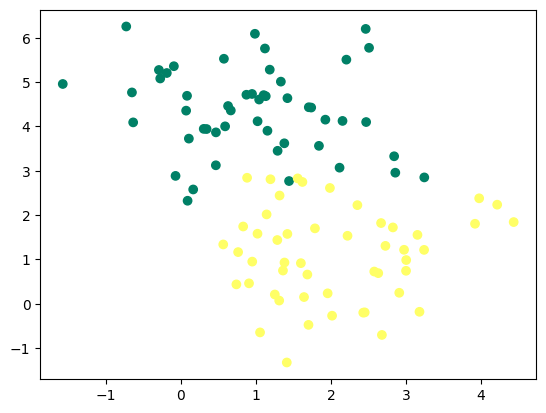

In [225]:
X, y = make_blobs(n_samples=100, n_features=2, centers=2, random_state=0)
#X[:, 1] = X[:, 1] * 10
print(X.shape)
y = y.reshape((y.shape[0], 1))
print(y.shape)

plt.scatter(X[:, 0], X[:, 1], c = y, cmap='summer')
plt.show()

## Fonctions du perceptron



In [104]:
def initialisation(X):
    W = np.random.randn(X.shape[1], 1)
    b = np.random.randn(1)
    return (W, b)

#W, b = initialisation(X)
#print(W)

[[ 1.4002627 ]
 [ 0.17854928]
 [-0.51092099]
 [-0.76706968]
 [-0.73835182]]


In [245]:
def model(X, W, b):
    Z = np.dot(X, W) + b
    A = 1 / (1 + np.exp(-Z))
    return A

#A = model(X, W, b)
#print(A.shape)

(100, 10000)


In [194]:
def logloss(A, y):
    epsilon = 1e-15
    L = 1/len(y) * np.sum(-y*np.log(A + epsilon)-(1-y)*np.log(1-A +epsilon))
    return L
#L = logloss(A, y)
#print(L)


3.8148678797126707


In [107]:
def gradients(A, y, X):
    dW = 1/len(y) * X.T.dot(A-y)
    db = 1/len(y) * np.sum(A-y)
    return (dW, db)
#dW, db = gradients(A, y, X)
#print(dW.shape)
#print(db)

(5, 1)
-0.13833825725432972


In [108]:
def update(W, b, dW, db, alpha):
    W = W - alpha*dW
    b = b - alpha*db
    return (W, b)
#W, b = update(W, b, dW, db, 0.2)
#print(W)
#print(b)

[[ 1.58993404]
 [-0.27388142]
 [ 0.11123122]
 [ 0.08324626]
 [-0.83557066]]
[-0.09850097]


In [158]:
def predict(X, W, b):
    A = model(X, W, b)
    return A

## Assemblage du perceptron

In [265]:
def artificial_neuron(X_train, y_train, X_test, y_test, learning_rate=0.1, n_iter=100):
    W, b = initialisation(X_train)
    train_loss = []
    test_loss = []
    train_acc = []
    test_acc = []

    for e in tqdm(range(n_iter)):
        A = model(X_train, W, b)
        dW, db = gradients(A, y_train, X_train)
        W, b = update(W, b, dW, db, learning_rate)

        #Tous les multiples de 10, on calcule les métriques:
        if e%10 == 0:
            train_loss.append(logloss(A, y_train))
            A_test = model(X_test, W, b)
            test_loss.append(logloss(A_test, y_test))
        
            y_pred_train = predict(X_train, W, b)
            train_acc.append(accuracy_score(y_train, (y_pred_train >= 0.5)))
            y_pred_test = predict(X_test, W, b)
            test_acc.append(accuracy_score(y_test, (y_pred_test >= 0.5)))
            
    plt.figure(figsize=(12,4))
    plt.subplot(1,2,1)
    plt.plot(train_loss, label='train loss')
    plt.plot(test_loss, label='test loss')
    plt.legend()
    plt.subplot(1,2,2)
    plt.plot(train_acc, label='train accuracy')
    plt.plot(test_acc, label='test accuracy')
    plt.legend()
    plt.show()
    
    return (W, b, train_loss, train_acc)

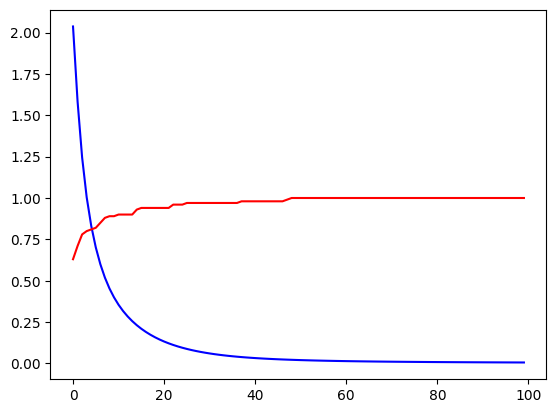

In [199]:
(W, b, Loss, Accuracy) = artificial_neuron(X, y)


## Prédictions

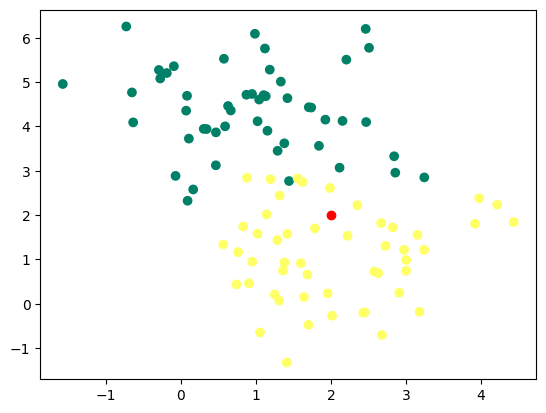

array([0.88079039])

In [47]:
new_plant = np.array([2, 1])
plt.scatter(X[:, 0], X[:, 1], c = y, cmap='summer')
plt.scatter(new_plant[0], new_plant[0], c ='red')
plt.show()
predict(new_plant, W, b)

### Tracer la frontière de décision

L'ensemble des points pour lesquel z(X) = 0.

Correspond à l'endroit ou les probabilités sont = 50% (0.5)

Le point ou a(z) = 0.5 correspond à l'endroit ou z(X) = 0

Donc l'équation de la frontière de décision: w1x1 + w2x2 +b =0 ce qui implique que x2 = (-w1x1 -b)/w2


In [77]:
# On choisit de tracer la ligne entre les abcisses -1 et 4
def decision_front(x1, W, b):
    return (-W[0]*x1 - b)/W[1]
x1 = np.linspace(-1, 4, 100)
x2 = decision_front(x1, W, b)
print(x2.shape)

(100,)


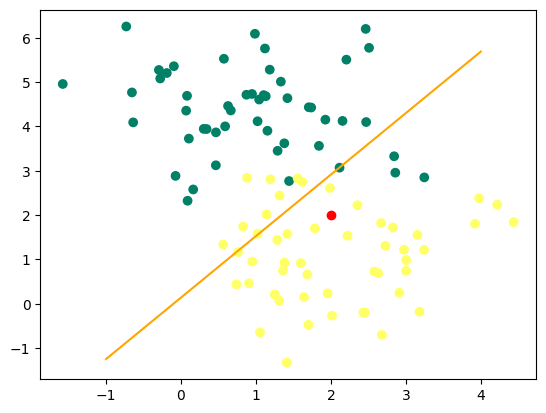

In [78]:
plt.scatter(X[:, 0], X[:, 1], c = y, cmap='summer')
plt.scatter(new_plant[0], new_plant[0], c ='red')
plt.plot(x1, x2, c='orange')
plt.show()

## Visualisations et Animation

### Animations

Manque la fonction animate qui définit l'animation: voir ca plus tard

Ces visualisations ne sont possibles que dans le cas d'un dataset avec 2 variables, sinon on ne peux que visualiser le coût et l'accuracy

In [127]:
import matplotlib.animation as animation

In [89]:
def animate(history):
    x1 = np.linspace(-1, 4, 100)
    for i in range(len(history)):
        W = history[:i][0]
        b = history[:i][1]
        #x2 = decision_front(x1, W, b)
        ax[0].plot(range(i), b)
        ax[1].plot(range(i), b)
        ax[2].plot(range(i), history[:i][2])

In [ ]:
fig, ax = plt.subplots(nrows = 1,ncols = 3, figsize = (40,10))
ani = animation.FuncAnimation(fig, animate, frames = history, interval = 200, repeat=False)

#Writer = animation.writers('ffnpeg')
#writer = Writer(fps=30, metadata=disct(artist='Me'), bitrate=3200)
#ani.save('animation.mp4', writer= writer)



### Visualisation de la fonction Cout

In [203]:
lim = 10
h = 100
W1 = np.linspace(-lim, +lim, h)
W2 = np.linspace(-lim, +lim, h)

# On les combine dans une meshgrid qui contient 10 000 configuration possible avec les 2 paramètres
W11, W22 = np.meshgrid(W1, W2)

W_final = np.c_[W11.ravel(), W22.ravel()].T

W_final.shape

(2, 10000)

In [222]:
# On veut passer toutes ces configurations dans la fonction Z
b = 0
Z = X.dot(W_final) + b
A = 1 / (1+np.exp(-Z))

A.shape

(100, 10000)

In [223]:
# On modifie la fonction logloss pour obtenir un cout pour chaque configuration parmis les 10000 (axis = 0)
epsilon = 1e-15
L = 1/len(y) * np.sum(-y*np.log(A + epsilon)-(1-y)*np.log(1-A +epsilon), axis=0).reshape(100,100)
L.shape

(100, 100)

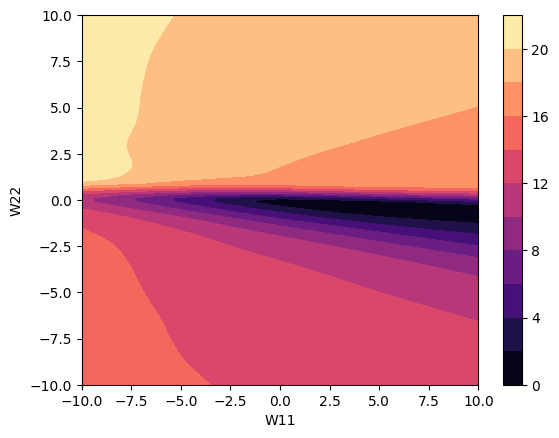

In [224]:
plt.contourf(W11, W22, L, 10, cmap='magma')
plt.colorbar()
plt.xlabel('W11')
plt.ylabel('W22')
plt.show()

## Exercice chat vs chien

0 pour chat, 1 pour chien

Principe: on considère chaque pixel de l'image comme une variable. Ici: images de 64x64 pixels donc 4086 variables. On aplati les images puis on les passe dans le perceptron comme précedemment.

### Mise en place

In [135]:
#!pip install h5py
import h5py
import numpy as np


def load_data():
    train_dataset = h5py.File('datasets/trainset.hdf5', "r")
    X_train = np.array(train_dataset["X_train"][:]) # your train set features
    y_train = np.array(train_dataset["Y_train"][:]) # your train set labels

    test_dataset = h5py.File('datasets/testset.hdf5', "r")
    X_test = np.array(test_dataset["X_test"][:]) # your train set features
    y_test = np.array(test_dataset["Y_test"][:]) # your train set labels
    
    return X_train, y_train, X_test, y_test

In [235]:
X_train, y_train, X_test, y_test = load_data()

In [236]:
print(X_train.shape)
print(y_train.shape)
print(np.unique(y_train, return_counts = True))
print(X_test.shape)
print(y_test.shape)
print(np.unique(y_test, return_counts = True))

(1000, 64, 64)
(1000, 1)
(array([0., 1.]), array([500, 500], dtype=int64))
(200, 64, 64)
(200, 1)
(array([0., 1.]), array([100, 100], dtype=int64))


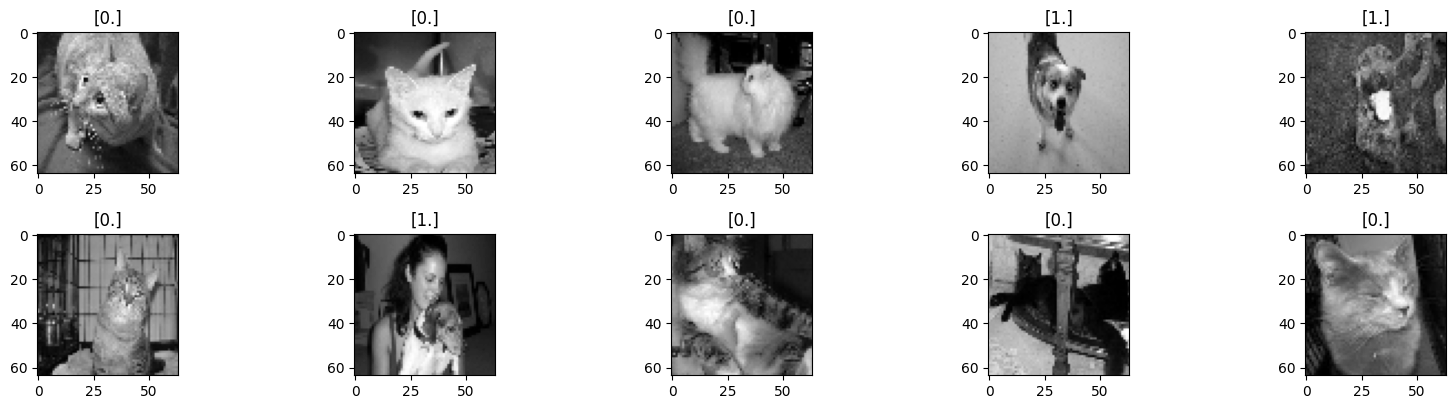

In [237]:
plt.figure(figsize=(16, 8))
for i in range(1, 11):
    plt.subplot(4, 5, i)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(y_train[i])
    plt.tight_layout()
plt.show()

### Développement du neurone

* TO DO 
1. Normaliser le train_set et le test_set (0-255 -> 0-1)
2. flatten() les variables du train_set et du test_set (64x64 -> 4096)
3. Entrainer le modele sur le train_set (tracer la courbe d'apprentissage, trouver les bons hyper-params: nombre d'itération et learning rate)
(si vous rencontrez un probleme avec le log_loss, utiliser la fonction de sklearn a la place !)
4. Évaluer le modele sur le test_set (tracer également la courbe de Loss pour le test_set)
5. Partager vos conclusions dans les commentaires !

In [238]:
print(X_train.shape)
X_train_f = X_train.reshape((len(X_train), -1))
print(X_train_f.shape)
X_test_f = X_test.reshape((len(X_test), -1))
print(X_test_f.shape)

(1000, 64, 64)
(1000, 4096)
(200, 4096)


In [239]:
# Normalisation min-max (x-xmin)/(xmax-xmin)
X_train_n = X_train_f / 255
X_test_n = X_test_f / 255

In [240]:
#y = y.reshape((y.shape[0], 1))
print(y_train.shape)

(1000, 1)


100%|██████████████████████████████████████████████████████████████████████████| 10000/10000 [00:08<00:00, 1192.27it/s]


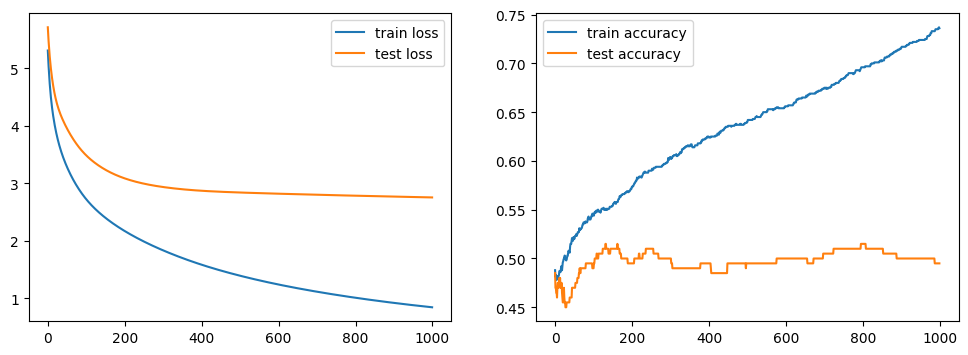

In [266]:
(Wc, bc, Lossc, Accuracyc) = artificial_neuron(X_train_n, y_train, X_test_n, y_test, 0.01, 10000)

In [186]:
y_test_pred = predict(X_test_f, Wc, bc)
print(accuracy_score(y_test, (y_test_pred>=0.5)))

0.5
